<a href="https://colab.research.google.com/github/jigme-ten/jigme-ten/blob/main/keyword_analysis_nearme_adgroup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GOAL**: Analyze keyword dataset. Filter keywords based on Avg Monthly searches and Bid Values.

In [1]:
## import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/near_me_Keyword Stats 2023-05-28 at 01_17_40 - near_me_Keyword Stats 2023-05-28 at 01_17_40.csv')
df.sample(10)

,Keyword,Avg. monthly searches,Competition,Top of page bid (low range),Top of page bid (high range)
702,return filing near me,50.0,Unknown,NaN,NaN
652,tax filing places open near me,50.0,Medium,NaN,NaN
292,tax providers near me,50.0,Medium,NaN,NaN
613,cpa to file taxes near me,50.0,Unknown,NaN,NaN
321,preparador de impuestos near me,50.0,Low,NaN,NaN
76,taxation office near me,50.0,Low,NaN,NaN
189,independent tax preparer near me,50.0,Medium,2.49,24.58
540,professional cpa near me,50.0,Low,NaN,NaN
856,the best place to file taxes near me,50.0,Unknown,NaN,NaN
792,accountants near me taxes,50.0,Unknown,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Keyword                       868 non-null    object 
 1   Avg. monthly searches         861 non-null    float64
 2   Competition                   868 non-null    object 
 3   Top of page bid (low range)   207 non-null    float64
 4   Top of page bid (high range)  207 non-null    float64
dtypes: float64(3), object(2)
memory usage: 34.0+ KB


In [ ]:
df = df.rename(columns={"Top of page bid (low range)": "low bid", "Top of page bid (high range)": "high bid", "Avg. monthly searches": "ams"})
df.head()

,Keyword,ams,Competition,low bid,high bid
0,taxes near me,5000.0,Low,7.56,31.89
1,tax places near me,5000.0,Low,5.49,21.97
2,tax consultant near me,500.0,Low,5.56,26.89
3,tax professional near me,500.0,Low,6.96,32.71
4,tax advisor near me,500.0,Low,7.35,27.70


In [ ]:
df.isnull().sum()

Keyword          0
ams              7
Competition      0
low bid        661
high bid       661
dtype: int64

In [ ]:
df['low bid'].median()

4.76

In [ ]:
df['high bid'].median()

21.91

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna(subset = ['ams'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 867
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Keyword      861 non-null    object 
 1   ams          861 non-null    float64
 2   Competition  861 non-null    object 
 3   low bid      207 non-null    float64
 4   high bid     207 non-null    float64
dtypes: float64(3), object(2)
memory usage: 40.4+ KB


In [ ]:
df.describe()

,ams,low bid,high bid
count,861.000000,207.000000,207.000000
mean,100.813008,5.136860,24.538309
std,450.406058,3.047354,16.671896
min,0.000000,0.170000,0.790000
25%,50.000000,2.940000,14.695000
50%,50.000000,4.760000,21.910000
75%,50.000000,6.775000,28.975000
max,5000.000000,18.210000,134.760000


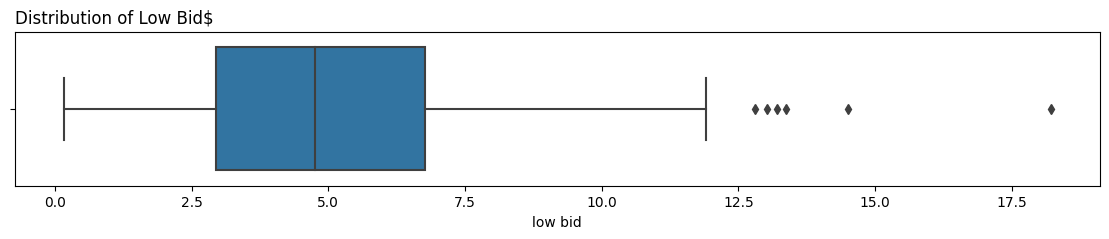

In [ ]:
plt.figure(figsize=(14,2))

sns.boxplot(data=df, x='low bid')

plt.title('Distribution of Low Bid$', loc='left')
plt.show()

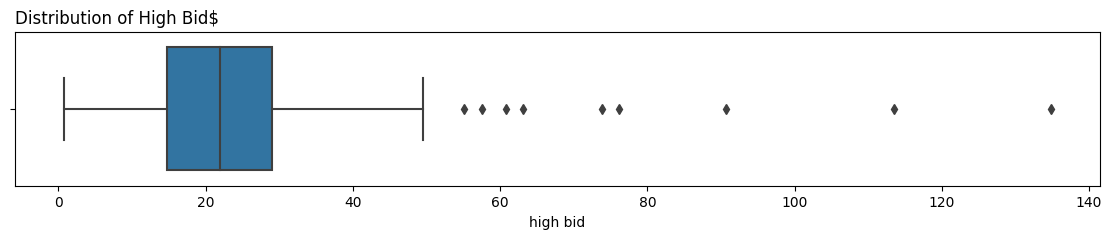

In [ ]:
plt.figure(figsize=(14,2))

sns.boxplot(data=df, x='high bid')

plt.title('Distribution of High Bid$', loc='left')
plt.show()

Replace NAN with median values.

In [ ]:
df['low bid'] = df['low bid'].fillna(df['low bid'].median())

In [ ]:
df['high bid'] = df['high bid'].fillna(df['high bid'].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 867
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Keyword      861 non-null    object 
 1   ams          861 non-null    float64
 2   Competition  861 non-null    object 
 3   low bid      861 non-null    float64
 4   high bid     861 non-null    float64
dtypes: float64(3), object(2)
memory usage: 72.6+ KB


In [ ]:
df.sample(20)

,Keyword,ams,Competition,low bid,high bid
580,tax prices near me,50.0,Medium,4.76,21.91
301,an accountant near me,50.0,Low,4.76,21.91
440,city taxes near me,50.0,Unknown,4.76,21.91
335,best tax preparers for seniors near me,50.0,Medium,4.76,21.91
850,income tax preparation for seniors near me,50.0,Unknown,4.76,21.91
737,foreign tax accountant near me,50.0,Medium,4.76,21.91
153,cross border tax accountant near me,50.0,Medium,2.49,16.16
232,vietnamese tax services near me,50.0,Unknown,4.76,21.91
299,tax counseling for the elderly near me,50.0,Medium,3.61,13.74
777,certified tax accountants near me,50.0,Low,4.76,21.91


In [ ]:
df.shape

(861, 5)

In [ ]:
df.describe()

,ams,low bid,high bid
count,861.000000,861.000000,861.000000
mean,100.813008,4.850604,22.541893
std,450.406058,1.500125,8.236639
min,0.000000,0.170000,0.790000
25%,50.000000,4.760000,21.910000
50%,50.000000,4.760000,21.910000
75%,50.000000,4.760000,21.910000
max,5000.000000,18.210000,134.760000


### Analysis

In [ ]:
df1 = df.loc[df['ams'] == 5000]
df1

sorted_data = df1.sort_values(by='low bid', ascending=False)
sorted_data

,Keyword,ams,Competition,low bid,high bid
7,accountants near me,5000.0,Low,8.52,57.48
0,taxes near me,5000.0,Low,7.56,31.89
6,cpa near me,5000.0,Low,6.55,24.98
11,tax accountant near me,5000.0,Low,6.00,27.97
9,tax services near me,5000.0,Low,5.77,20.01
1,tax places near me,5000.0,Low,5.49,21.97
8,tax preparer near me,5000.0,Low,4.12,18.44


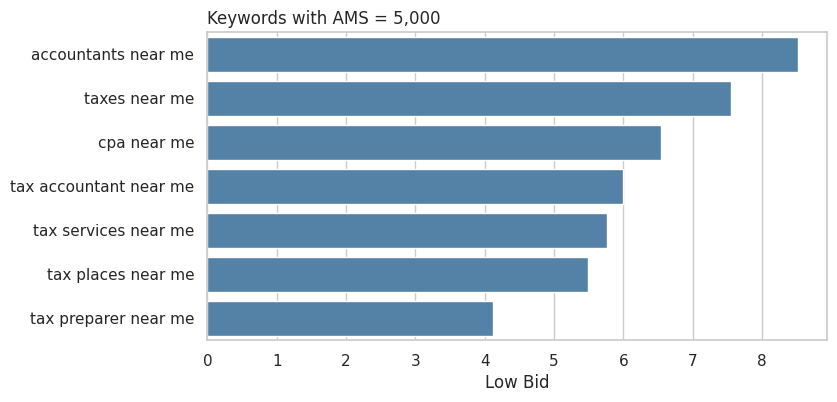

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,4))

sns.barplot(x='low bid', y='Keyword', data=sorted_data, color='steelblue')

plt.title('Keywords with AMS = 5,000', loc='left', fontsize='12')
plt.ylabel('')

plt.xlabel('Low Bid')

plt.show()

In [ ]:
df2 = df.loc[df['ams'] == 500]
df2

,Keyword,ams,Competition,low bid,high bid
2,tax consultant near me,500.0,Low,5.56,26.89
3,tax professional near me,500.0,Low,6.96,32.71
4,tax advisor near me,500.0,Low,7.35,27.70
5,tax help near me,500.0,Medium,7.76,26.80
10,tax office near me,500.0,Low,3.99,20.39
13,best cpa near me,500.0,Low,3.53,16.98
14,tax agent near me,500.0,Low,6.96,21.07
15,tax filing near me,500.0,Low,7.01,29.00
16,best tax service near me,500.0,Low,4.53,23.37
17,income tax near me,500.0,Low,4.56,17.60


In [ ]:
sorted = df2.sort_values(by='low bid', ascending=False)
sorted.head()

,Keyword,ams,Competition,low bid,high bid
66,tax specialists near me,500.0,Low,9.53,39.41
5,tax help near me,500.0,Medium,7.76,26.80
4,tax advisor near me,500.0,Low,7.35,27.70
21,tax experts near me,500.0,Low,7.21,26.81
15,tax filing near me,500.0,Low,7.01,29.00


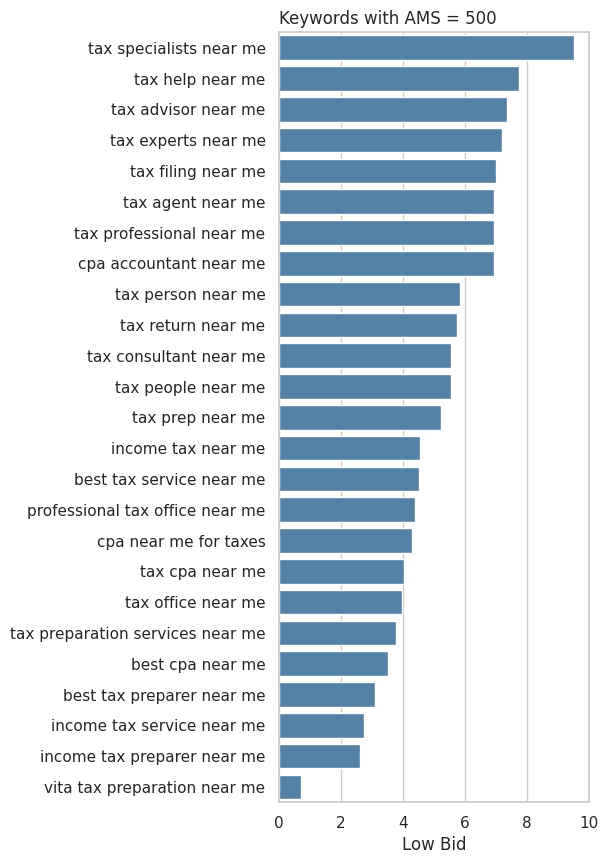

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(4,10))

sns.barplot(x='low bid', y='Keyword', data=sorted, color='steelblue')

plt.title('Keywords with AMS = 500', loc='left', fontsize='12')
plt.ylabel('')

plt.xlabel('Low Bid')

plt.show()

In [ ]:
df3 = df2.loc[df2['low bid'] < 4]
df3

,Keyword,ams,Competition,low bid,high bid
10,tax office near me,500.0,Low,3.99,20.39
13,best cpa near me,500.0,Low,3.53,16.98
20,income tax service near me,500.0,Low,2.74,16.90
27,income tax preparer near me,500.0,Low,2.63,13.72
29,tax preparation services near me,500.0,Low,3.77,22.54
32,best tax preparer near me,500.0,Low,3.11,19.14
33,vita tax preparation near me,500.0,Low,0.71,5.67
